In [1]:
from diffusion_curvature import diffusion_curvature
import numpy as np
from sklearn.linear_model import LinearRegression
from manifolds import ellipsoid_ground_truth, hyperboloid_ground_truth, hyperboloid_ground_truth_a_eql_b
import matplotlib.pyplot as plt
from abby_curvature import scalar_curvature_est

In [2]:
n = 2
path = '../src/results/torus/'
torus = np.loadtxt(path + 'torus_cloud_ratio_4.0.csv', delimiter=',')
our_torus = np.loadtxt(path +  'curvature_torus_ratio_4.0_combined.csv')
true_torus = np.loadtxt(path + 'torus_K_ratio_4.0.csv')
dc_torus = diffusion_curvature(torus)
sce_torus = scalar_curvature_est(n, torus)
ab_torus = sce_torus.estimate(rmax=np.pi/2)

Running MAGIC on 5000 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.10 seconds.
  Calculating affinities...
  Calculated affinities in 0.17 seconds.
Calculated graph and diffusion operator in 0.32 seconds.
computed Rdist
computed density
computed nearest neighbor matrices


In [3]:
# ab_torus = sce_torus.estimate(rmax=np.pi/2)

In [4]:
non_na_id = ~np.isnan(our_torus)
print("ours:", np.corrcoef(-our_torus[non_na_id], true_torus[non_na_id])[0, 1])
print("diffusion:", np.corrcoef(dc_torus, true_torus)[0, 1])
print("abby:", np.corrcoef(ab_torus, true_torus)[0, 1])

ours: 0.9150011881770577
diffusion: 0.6271172533670746
abby: 0.9948316060541429


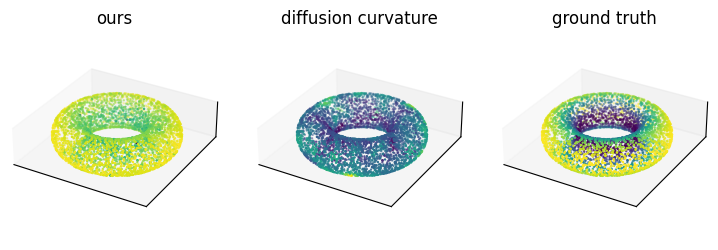

In [17]:
fig = plt.figure(figsize=(7.5, 2.5))

v = our_torus
cc = -v
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(torus[:, 0], torus[:, 1], torus[:, 2], s=0.5, c = cc)
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_title("ours")

v = true_torus
cc = v
ax3 = fig.add_subplot(133, projection='3d')
scatter = ax3.scatter(torus[:, 0], torus[:, 1], torus[:, 2], s=0.5, c = cc)
ax3.set_aspect('equal')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])
ax3.set_title("ground truth")

v = dc_torus
cc = v
ax2 = fig.add_subplot(132, projection='3d')
scatter = ax2.scatter(torus[:, 0], torus[:, 1], torus[:, 2], s=0.5, c = cc)
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_title("diffusion curvature")

plt.tight_layout()

plt.savefig("torus.pdf", dpi=300)

plt.show()

In [6]:
n = 2
# path = '../src/results/ellipsoid_4_old/'
path = '../src/ellipsoid/'
ellipsoid = np.loadtxt(path + 'ellipsoid_cloud_ratio_4.0.csv', delimiter=',')
our_ellipsoid = np.loadtxt(path +  'curvature_ellipsoid_ratio_4.0_combined.csv')
# true_ellipsoid = np.array(ellipsoid_ground_truth(ellipsoid, 1, 2, 0.5))
true_ellipsoid = np.loadtxt(path + 'torus_K_ratio_4.0.csv')
dc_ellipsoid = diffusion_curvature(ellipsoid)
dc_ellipsoid = diffusion_curvature(ellipsoid)
sce_ellipsoid = scalar_curvature_est(n, ellipsoid)
ab_ellipsoid = sce_ellipsoid.estimate(rmax=np.pi/2)

Running MAGIC on 5000 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.09 seconds.
  Calculating affinities...
  Calculated affinities in 0.11 seconds.
Calculated graph and diffusion operator in 0.25 seconds.
Running MAGIC on 5000 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.07 seconds.
  Calculating affinities...
  Calculated affinities in 0.11 seconds.
Calculated graph and diffusion operator in 0.23 seconds.
computed Rdist
computed density
computed nearest neighbor matrices


In [7]:
non_na_id = ~np.isnan(our_ellipsoid)
print("ellipsoid")
print("ours", np.corrcoef(our_ellipsoid[non_na_id], true_ellipsoid[non_na_id])[0, 1])
print("diffusion", np.corrcoef(dc_ellipsoid, true_ellipsoid)[0, 1])
print("abby", np.corrcoef(ab_ellipsoid, true_ellipsoid)[0, 1])

ellipsoid
ours 0.41559459407184307
diffusion -0.028691406039526645
abby 0.9482434549641744


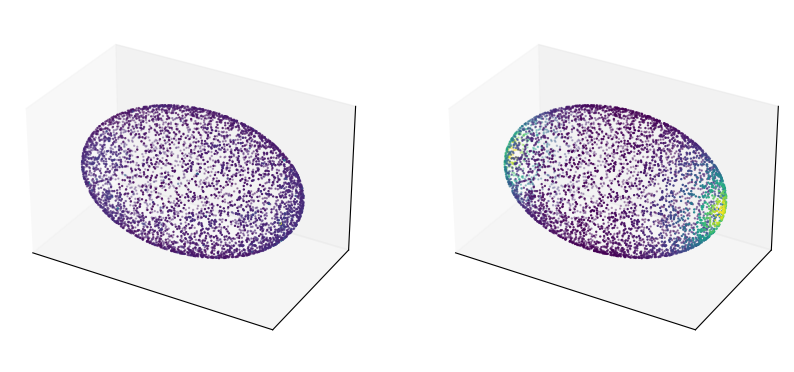

In [8]:
fig = plt.figure(figsize=(10, 5))

v = our_ellipsoid
cc = v
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=0.5, c = cc)
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])

v = true_ellipsoid
cc = v
ax2 = fig.add_subplot(122, projection='3d')
scatter = ax2.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=0.5, c = cc)
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])

plt.savefig("ellipsoid.pdf", dpi=300)
plt.show()

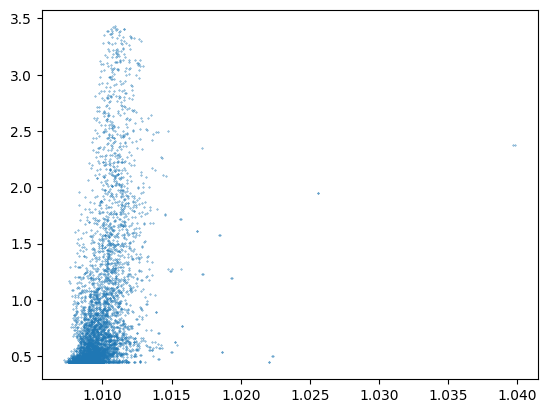

In [10]:
plt.scatter(our_ellipsoid, true_ellipsoid, s=0.1)

In [12]:
keep_id = our_ellipsoid < 1.012
(1-keep_id).sum()

353

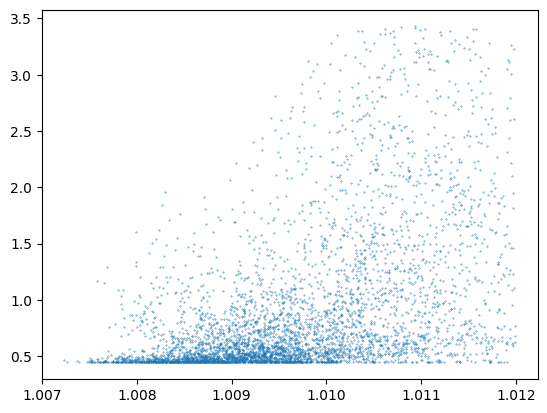

In [13]:
plt.scatter(our_ellipsoid[keep_id], true_ellipsoid[keep_id], s=0.1)

55


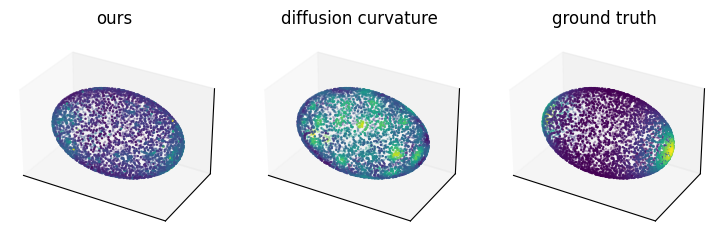

In [18]:
keep_id = our_ellipsoid < 1.02
print((1-keep_id).sum())
fig = plt.figure(figsize=(7.5, 2.5))
v = our_ellipsoid[keep_id]
cc = v
ax1 = fig.add_subplot(131, projection='3d')
scatter = ax1.scatter(ellipsoid[keep_id, 0], ellipsoid[keep_id, 1], ellipsoid[keep_id, 2], s=0.5, c = cc)
ax1.set_aspect('equal')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_title("ours")

v = true_ellipsoid
cc = v
ax3 = fig.add_subplot(133, projection='3d')
scatter = ax3.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=0.5, c = cc)
ax3.set_aspect('equal')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_zticks([])
ax3.set_title("ground truth")

v = dc_ellipsoid
cc = v
ax2 = fig.add_subplot(132, projection='3d')
scatter = ax2.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=0.5, c = cc)
ax2.set_aspect('equal')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_title("diffusion curvature")
plt.tight_layout()
plt.savefig("ellipsoid.pdf", dpi=300)
plt.show()

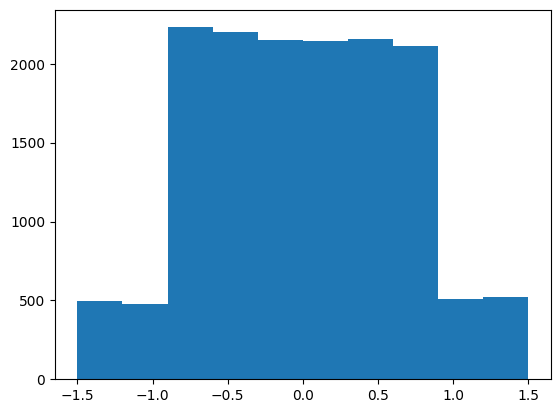

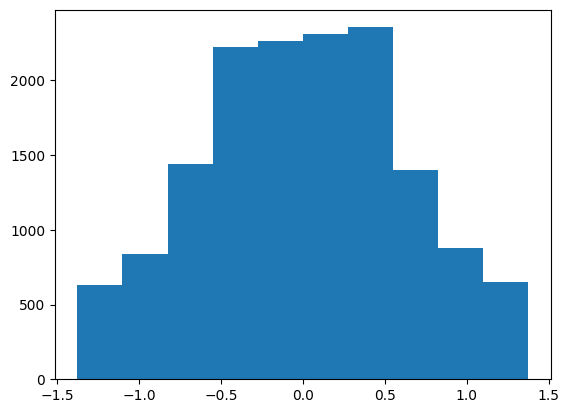

In [15]:
plt.hist(ellipsoid.flatten())
plt.show()
plt.hist(torus.flatten())
plt.show()

(array([ 162.,  844., 1329., 1052.,  778.,  440.,  188.,   88.,   30.,
          13.]),
 array([1.00723446, 1.00801016, 1.00878586, 1.00956156, 1.01033726,
        1.01111296, 1.01188866, 1.01266436, 1.01344006, 1.01421576,
        1.01499146]),
 <BarContainer object of 10 artists>)

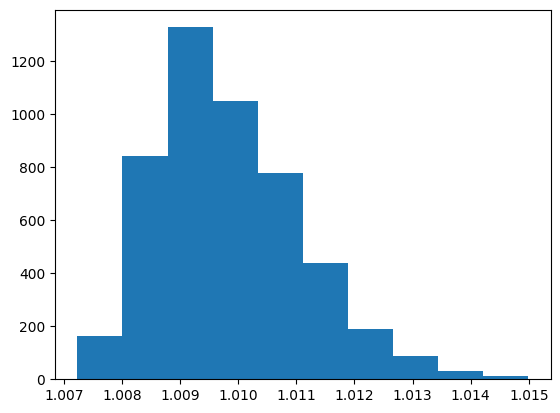

In [12]:
plt.hist(our_ellipsoid[our_ellipsoid < 1.015])

(array([2975.,  684.,  394.,  261.,  201.,  148.,  112.,   85.,   76.,
          64.]),
 array([0.44444445, 0.74289598, 1.04134751, 1.33979904, 1.63825057,
        1.9367021 , 2.23515364, 2.53360517, 2.8320567 , 3.13050823,
        3.42895976]),
 <BarContainer object of 10 artists>)

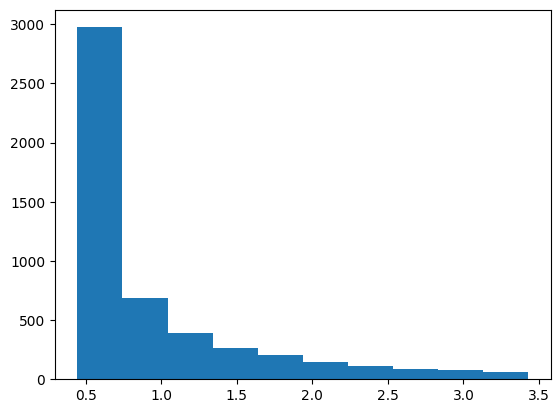

In [11]:
plt.hist(true_ellipsoid)

In [2]:
path = '../src/results/hyperboloid_old/'
hyperboloid = np.loadtxt(path + 'hyperboloid_cloud_ratio_4.csv', delimiter=',')
cut_ids = np.loadtxt(path + 'hyperboloid_cloud_ratio_4_cutted_index.csv', delimiter=',').astype(int)
our_hyperboloid = np.loadtxt(path +  'curvature_hyperboloid_ratio_4_combined.csv')
hyperboloid = hyperboloid[cut_ids]
# our_hyperboloid = our_hyperboloid[cut_ids]
true_hyperboloid = np.array(hyperboloid_ground_truth_a_eql_b(hyperboloid, 1, 0.5))
dc_hyperboloid = diffusion_curvature(hyperboloid)

Running MAGIC on 4700 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.39 seconds.
  Calculating affinities...
  Calculated affinities in 0.17 seconds.
Calculated graph and diffusion operator in 0.62 seconds.


In [4]:
n = 2
sce_hyperboloid = scalar_curvature_est(n, hyperboloid)
ab_hyperboloid = sce_hyperboloid.estimate(rmax=np.pi/2)

computed Rdist
computed density
computed nearest neighbor matrices


In [5]:
non_na_id = ~np.isnan(our_hyperboloid)
print("hyperboloid")
print("ours", np.corrcoef(-our_hyperboloid[non_na_id], true_hyperboloid[non_na_id])[0, 1])
print("diffusion", np.corrcoef(dc_hyperboloid, true_hyperboloid)[0, 1])
print("abby", np.corrcoef(ab_hyperboloid, true_hyperboloid)[0, 1])

hyperboloid
ours 0.5780570669448202
diffusion 0.390531903454547
abby 0.599912948837047


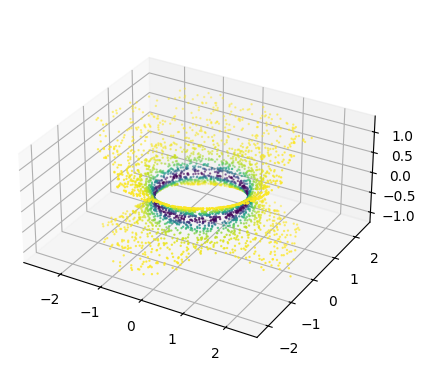

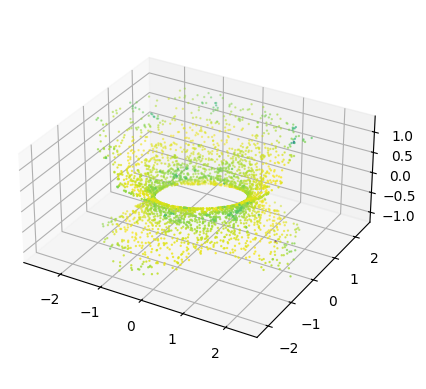

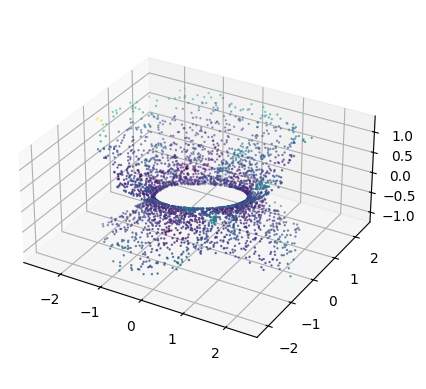

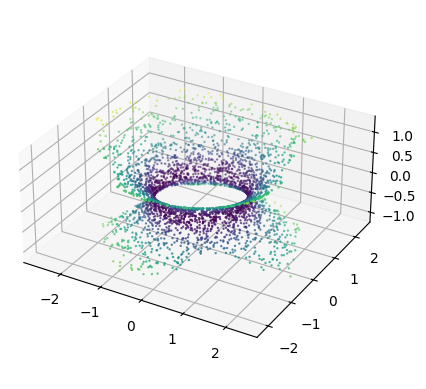

In [10]:
non_na_id = ~np.isnan(our_hyperboloid)
true_curv = true_hyperboloid[non_na_id]
our_curv = -our_hyperboloid[non_na_id]
dcurv = dc_hyperboloid[non_na_id]
abby_curv = np.array(ab_hyperboloid)[non_na_id]

filtered_hyperboloid = hyperboloid[non_na_id, :]

v = true_curv
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_hyperboloid[:, 0], filtered_hyperboloid[:, 1], filtered_hyperboloid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on hyperboloid point cloud")
# ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_hyperboloid.png', dpi = 300)

# hyperboloid = pd.read_csv('output/hyperboloid_cloud_ratio_4.csv', sep=',', header=None)
# hyperboloid = np.array(hyperboloid)
# df = pd.read_csv('output/curvature_hyperboloid_ratio_4.csv', sep=',', header=None)
v = our_curv
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_hyperboloid[:, 0], filtered_hyperboloid[:, 1], filtered_hyperboloid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on hyperboloid point cloud")
# ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_hyperboloid.png', dpi = 300)


# hyperboloid = pd.read_csv('output/hyperboloid_cloud_ratio_4.csv', sep=',', header=None)
# hyperboloid = np.array(hyperboloid)
# df = pd.read_csv('output/curvature_hyperboloid_ratio_4.csv', sep=',', header=None)
v = dcurv
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_hyperboloid[:, 0], filtered_hyperboloid[:, 1], filtered_hyperboloid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on hyperboloid point cloud")
# ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_hyperboloid.png', dpi = 300)

# hyperboloid = pd.read_csv('output/hyperboloid_cloud_ratio_4.csv', sep=',', header=None)
# hyperboloid = np.array(hyperboloid)
# df = pd.read_csv('output/curvature_hyperboloid_ratio_4.csv', sep=',', header=None)
v = abby_curv
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_hyperboloid[:, 0], filtered_hyperboloid[:, 1], filtered_hyperboloid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on hyperboloid point cloud")
# ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_hyperboloid.png', dpi = 300)

In [ ]:
# from abby_manifold import Hyperboloid
# true_hyperboloid2 = Hyperboloid.S(hyperboloid[:, 2])
# non_na_id = ~np.isnan(our_hyperboloid)
# print("hyperboloid w/ their true curvature formula")
# print("ours", np.corrcoef(-our_hyperboloid[non_na_id], true_hyperboloid2[non_na_id])[0, 1])
# print("diffusion", np.corrcoef(dc_hyperboloid, true_hyperboloid2)[0, 1])
# print("abby", np.corrcoef(ab_hyperboloid, true_hyperboloid2)[0, 1])

hyperboloid
ours 0.5286007553336787
diffusion 0.5597874374194077
abby 0.7870798750024997


In [20]:
ab_torus0 = ab_torus

In [27]:
sce_torus = scalar_curvature_est(n, torus)
ab_torus1 = sce_torus.estimate(rmax=np.pi/2)

computed Rdist
computed density
computed nearest neighbor matrices


In [28]:
((np.array(ab_torus1) - np.array(ab_torus0))**2).max()

0.0

In [23]:
ab_torus

[-2.260236409643825,
 -3.130536196882594,
 2.0868853579520596,
 -1.3119092978923614,
 2.1686882045421627,
 2.624832150509382,
 0.9111797842194609,
 1.8813931120718772,
 1.6015253117063688,
 -2.6951909330519754,
 1.7697074484142523,
 -0.27981735967983773,
 -3.047570864662111,
 -1.7829654005551374,
 1.3450300105844795,
 1.0677193657774684,
 2.8008266613479287,
 -0.8931431432036915,
 -2.920596719880212,
 2.1391492464490542,
 -1.0874769758230145,
 -2.802976242286216,
 2.8166733839869686,
 -0.21424642915466258,
 2.70836288844149,
 -3.080769341705424,
 0.25497189709899276,
 2.713219940558904,
 0.03812974681644611,
 2.269388855594759,
 -0.561785231521853,
 -3.11853452455733,
 -2.857968484345071,
 -2.322018519302482,
 1.6766396043498486,
 -2.070723830604792,
 -2.098209894016039,
 2.8488088530852353,
 0.04286835982960686,
 2.7881040704069933,
 0.6904320240702528,
 -2.5060935211977653,
 1.3530559608188142,
 -1.1592389273336037,
 -1.9698634801465804,
 -2.1993065054167316,
 -3.178953498108976,
 -3